In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img0 = cv2.imread('../data/Lena.png')
M = np.array([[math.cos(np.pi/12), -math.sin(np.pi/12), 0],
             [math.sin(np.pi/12), math.cos(np.pi/12), 0],
             [0,0,1]])
Moff = np.eye(3)
Moff[0,2] = -img0.shape[1]/2
Moff[1,2] = -img0.shape[0]/2

print(np.linalg.inv(Moff)@M@Moff)

img1 = cv2.warpPerspective(img0, np.linalg.inv(Moff)@M@Moff, (img0.shape[1], img0.shape[0]), 
                           borderMode=cv2.BORDER_REPLICATE)

cv2.imwrite('../data/Lena_rotated.png', img1)

[[  0.96592583  -0.25881905  74.98066402]
 [  0.25881905   0.96592583 -57.53468708]
 [  0.           0.           1.        ]]


True

In [3]:
img0 = cv2.imread('../data/Lena.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('../data/Lena_rotated.png', cv2.IMREAD_GRAYSCALE)

In [4]:
detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)

In [5]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches01 = matcher.knnMatch(fea0, fea1, k=2)
matches10 = matcher.knnMatch(fea1, fea0, k=2)

In [6]:
def ratio_test(matches, ratio_thr):
    good_matches = []
    for m in matches:
        ratio = m[0].distance / m[1].distance
        if ratio < ratio_thr:
            good_matches.append(m[0])
    return good_matches

RATIO_THR = 0.7  # Lower values mean more aggressive filtering.
good_matches01 = ratio_test(matches01, RATIO_THR)
good_matches10 = ratio_test(matches10, RATIO_THR)

In [7]:
good_matches10_ = {(m.trainIdx, m.queryIdx) for m in good_matches10}
final_matches = [m for m in good_matches01 if (m.queryIdx, m.trainIdx) in good_matches10_]

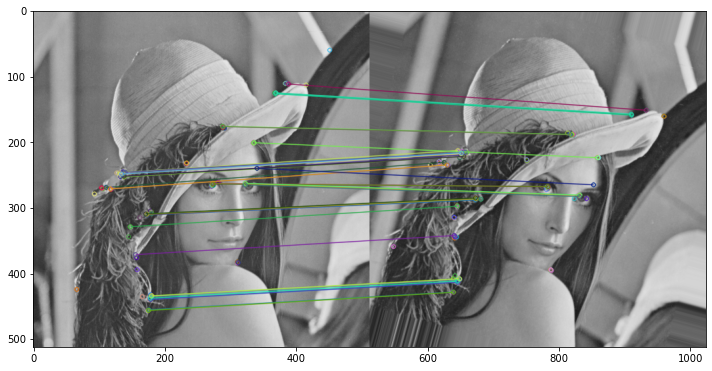

In [9]:
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, final_matches, None)
plt.figure(figsize=(10,7))
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()